# Цель проекта: Разработать ML-модель, которая определяет клиентов, склонных к уходу от оператора связи, что позволяет удерживать ценных клиентов и сокращать потери.

## Знакомство с данными - проверка структуры таблицы, типов данных, наличия пропусков и общего содержания датасета.

In [1]:
import pandas as pd  # Импорт библиотеки Pandas для работы с табличными данными
import numpy as np   # Импорт библиотеки NumPy для работы с числовыми вычислениями и массивами

In [2]:
df = pd.read_csv(r"C:\Users\leono\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
'customerID': 'ID_клиента',
'gender': 'Пол',
'SeniorCitizen': 'Пенсионер',
'Partner': 'Партнер',
'Dependents': 'Иждивенцы',
'tenure': 'Срок_обслуживания',
'PhoneService': 'Телефонная_служба',
'MultipleLines': 'Множественные_линии',
'InternetService': 'Интернет_провайдер',
'OnlineSecurity': 'Онлайн_безопасность',
'OnlineBackup': 'Онлайн_резервное_копирование',
'DeviceProtection': 'Защита_устройства',
'TechSupport': 'Техническая_поддержка',
'StreamingTV': 'Потоковое_TV',
'StreamingMovies': 'Потоковые_фильмы',
'Contract': 'Контракт',
'PaperlessBilling': 'Безбумажный_биллинг',
'PaymentMethod': 'Способ_оплаты',
'MonthlyCharges': 'Ежемесячные_платежи',
'TotalCharges': 'Общие_платежи',
'Churn': 'Отток'

In [3]:
df.head(5)  # первые 5 строк датасета

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail(5)  # последние 5 строк датасета  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()   # общая информация о данных (типы, пропуски)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()  # количество пропусков в каждом столбце

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns  # список всех названий колонок

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Подготовка и визуальный анализ данных

In [8]:
# Импорт необходимых библиотек
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
dfe = df.apply(LabelEncoder().fit_transform)  # Преобразование всех категориальных признаков в числовые

In [10]:
dfe.head(5)  # Просмотр первых 5 строк преобразованного датафрейма

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1


In [11]:
dfe["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [12]:
# Функция для построения countplot с настройками
def f(Data, x_column, hue_column):
    fig, ax = plt.subplots(figsize=(14, 10))
    sns.countplot(data=Data, x=x_column, hue=hue_column, ax=ax)
    ax.grid()
    ax.legend(fontsize=25)
    ax.set_ylabel(x_column)
    ax.set_xlabel(hue_column)
    for container in ax.containers:
        ax.bar_label(container, fontsize=20)
    return fig, ax

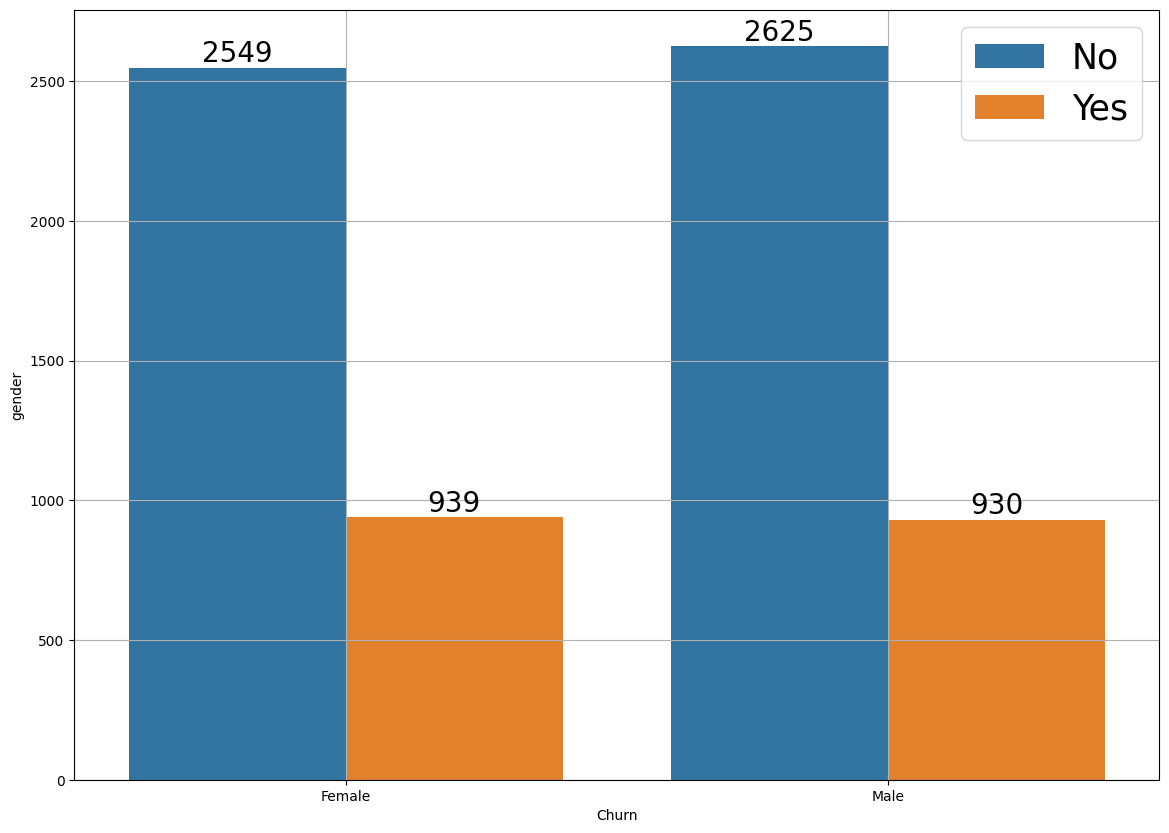

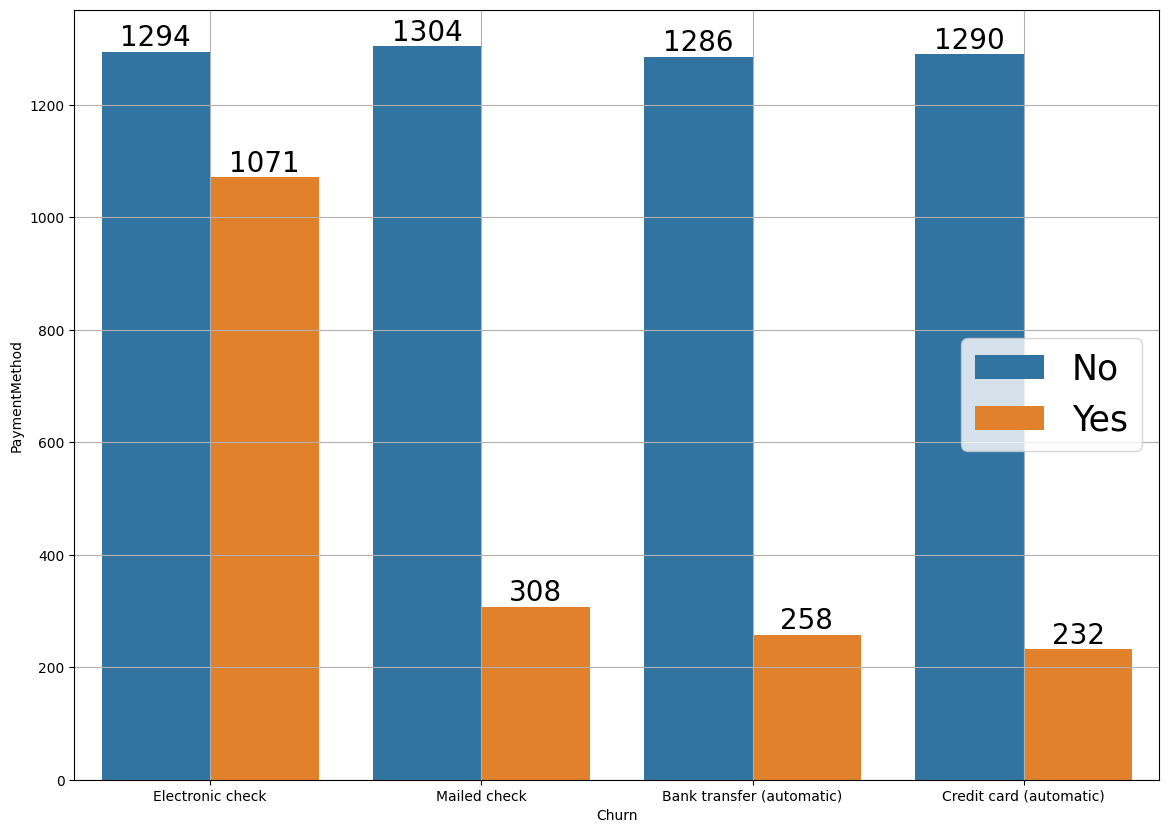

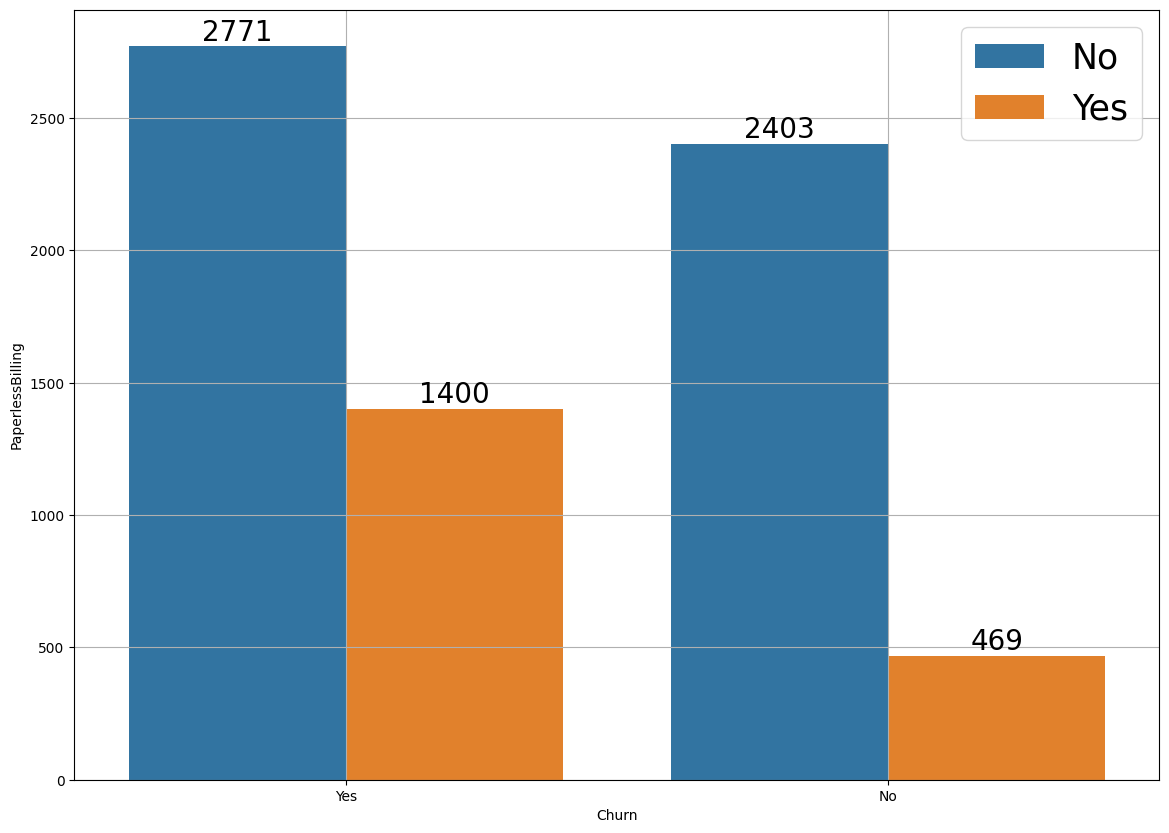

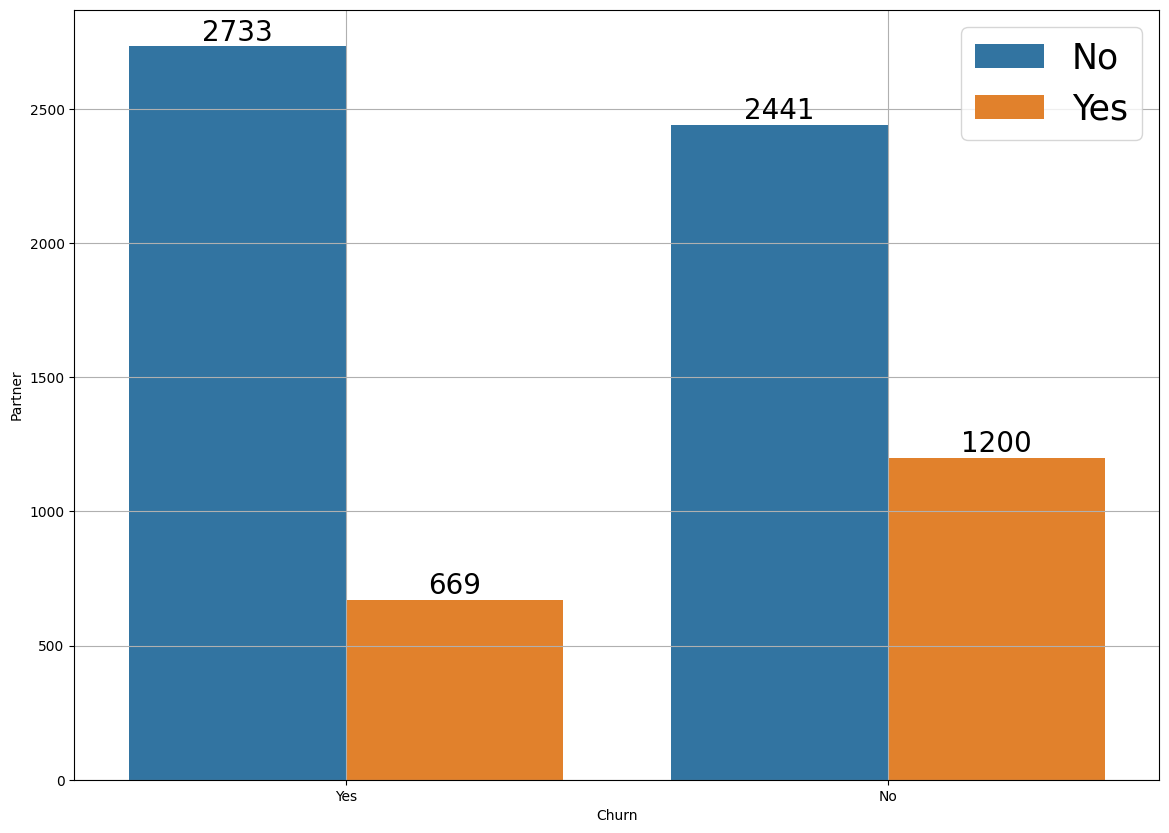

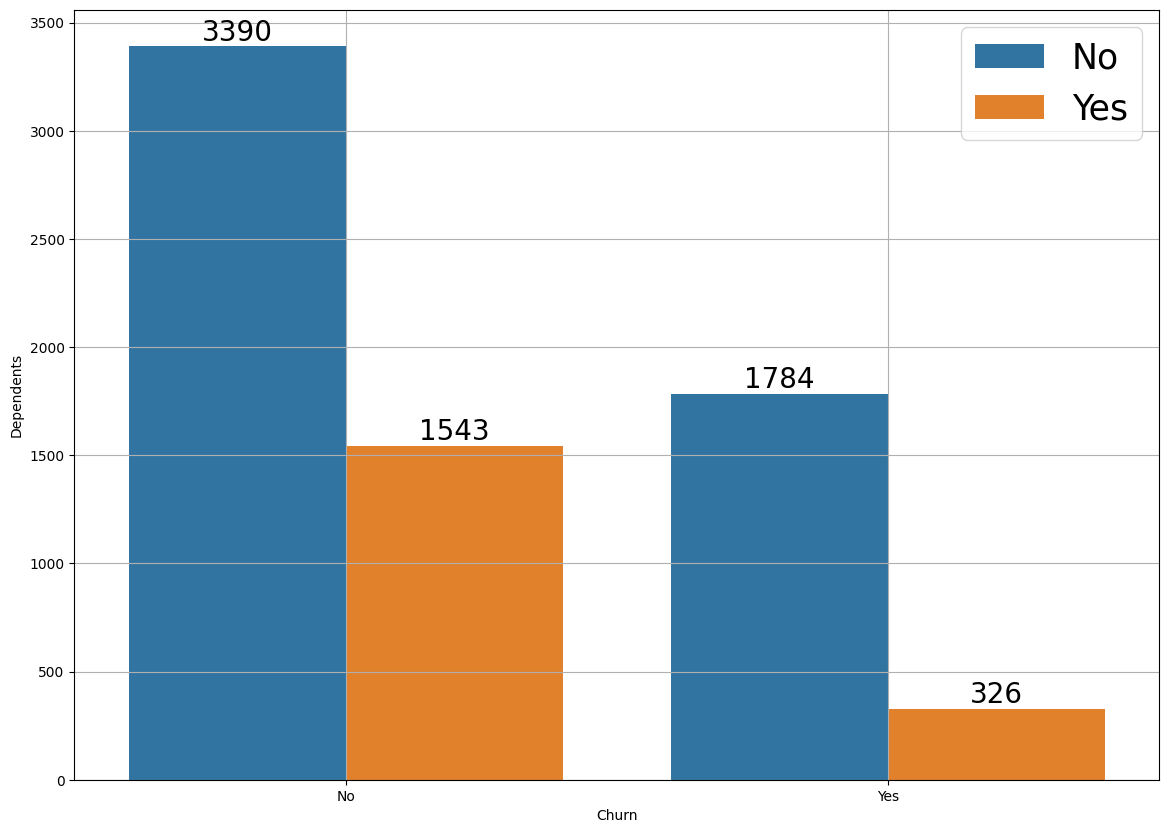

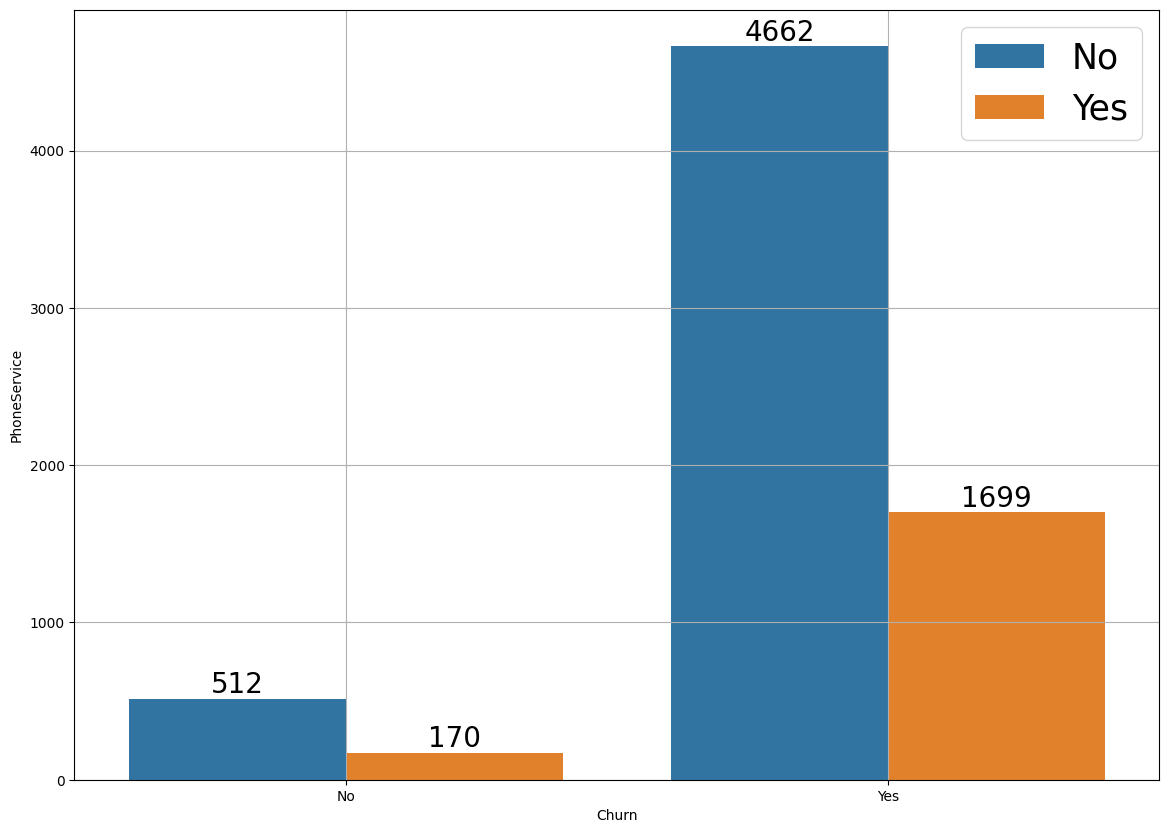

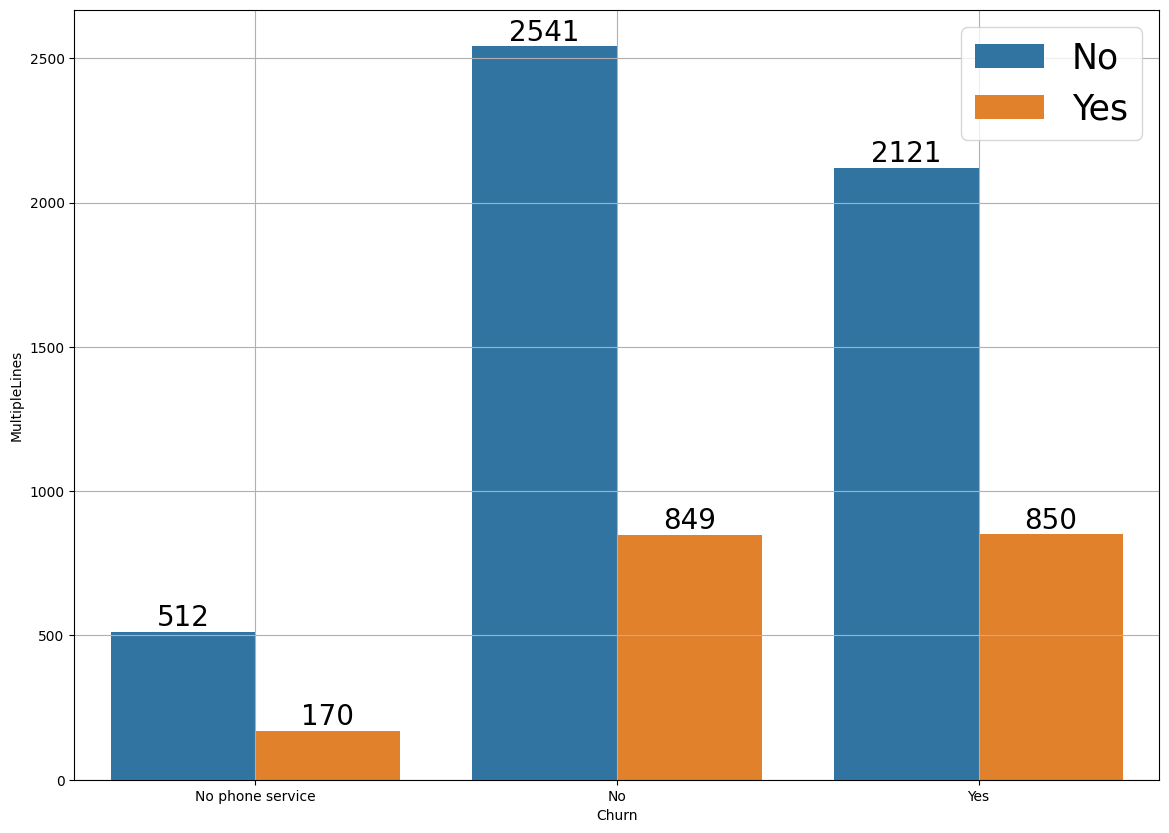

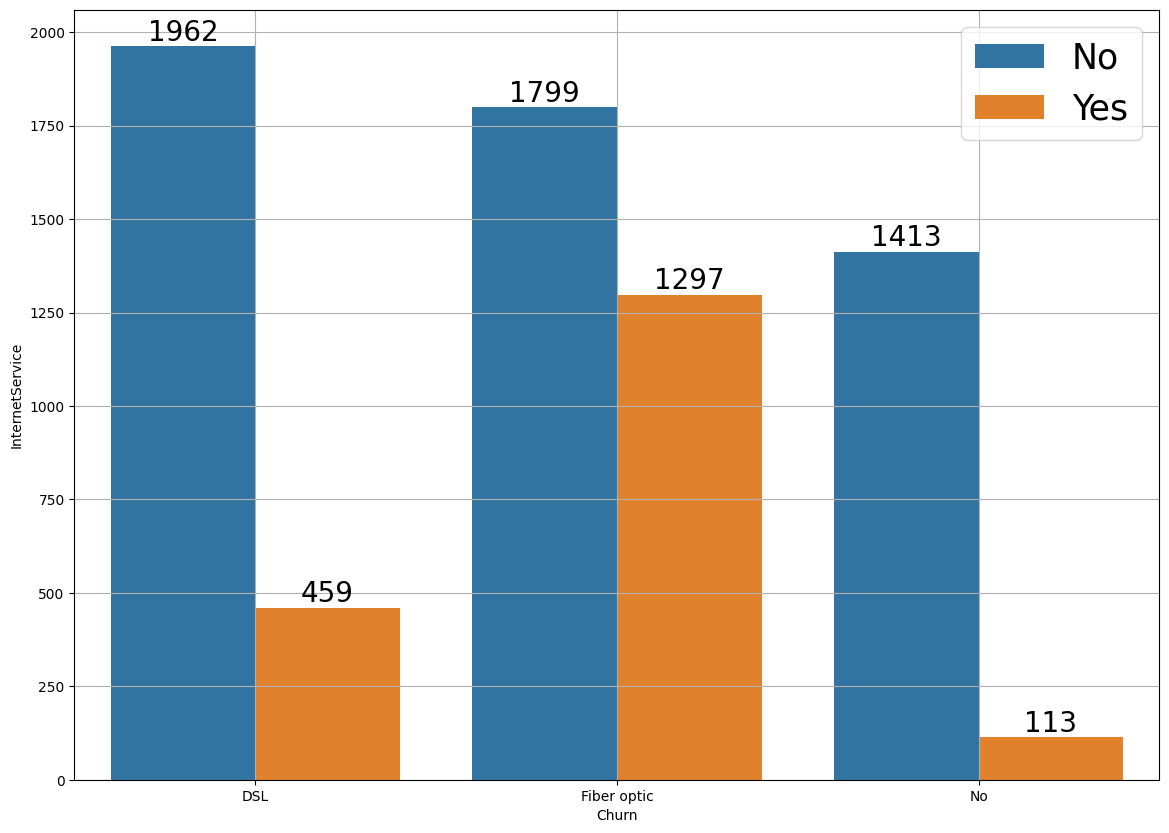

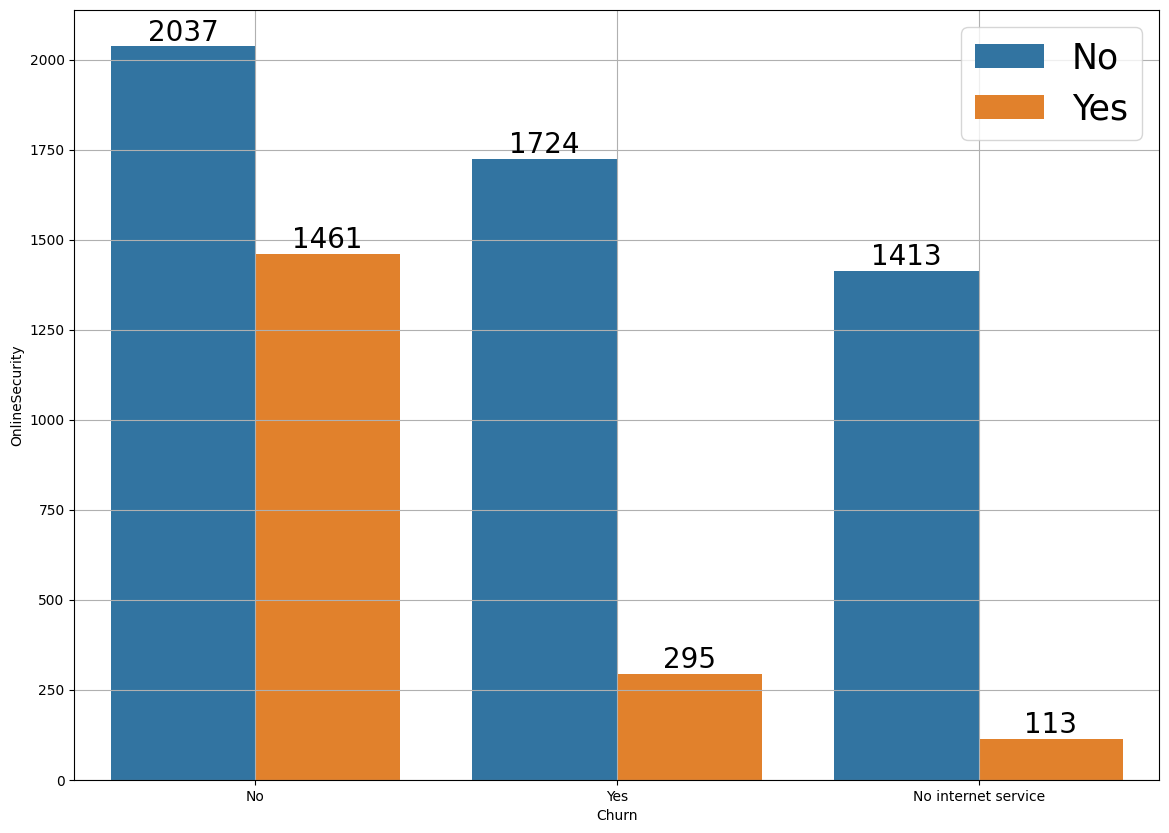

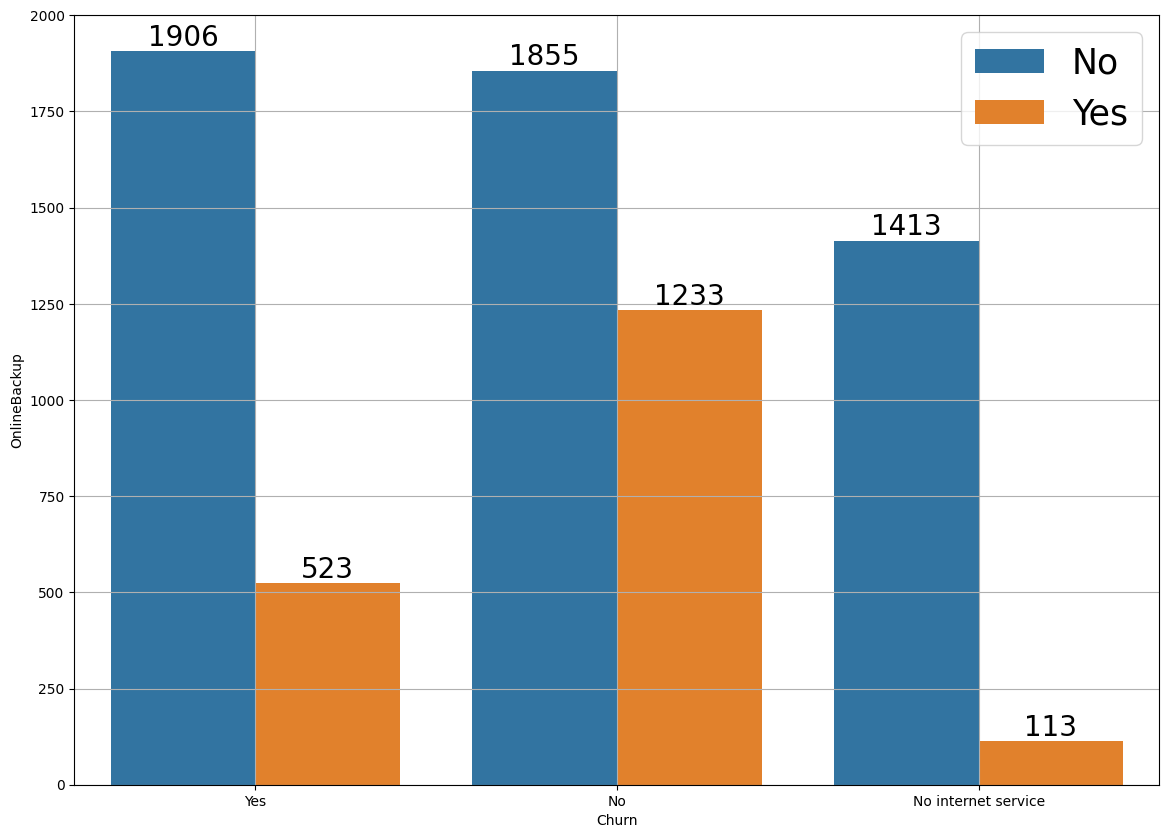

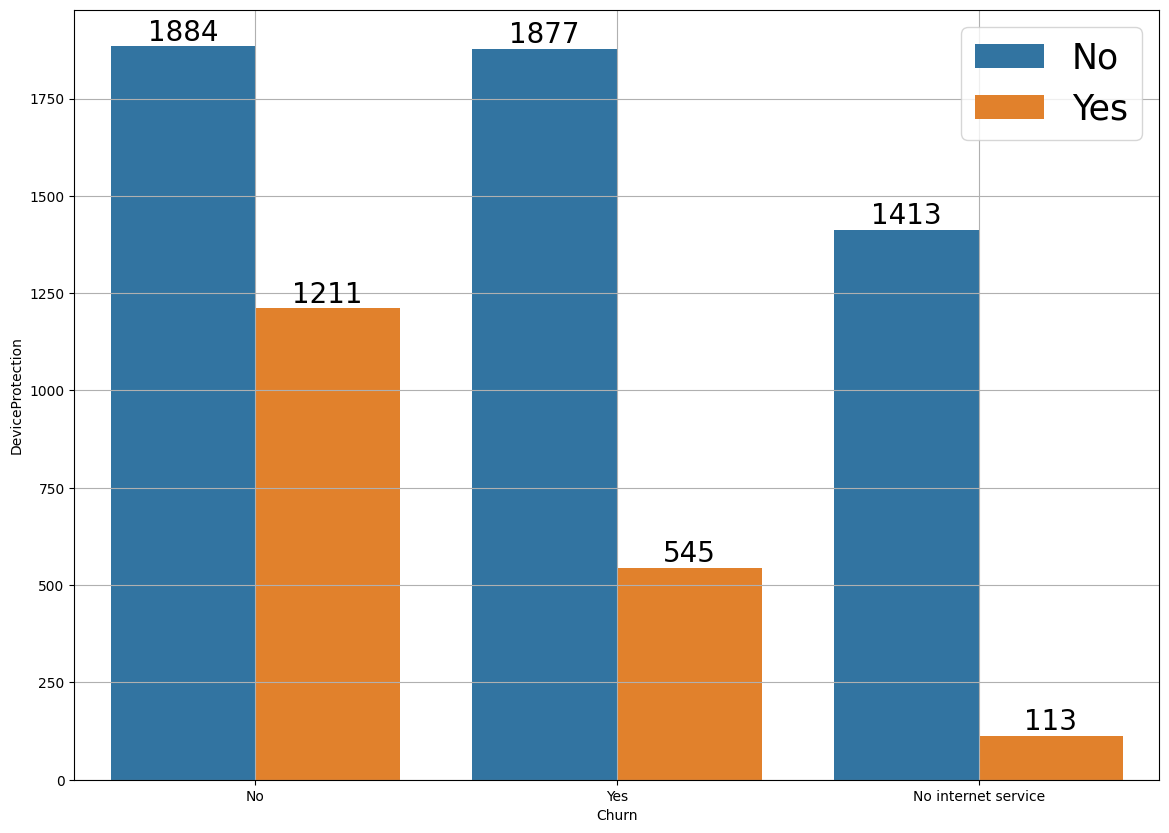

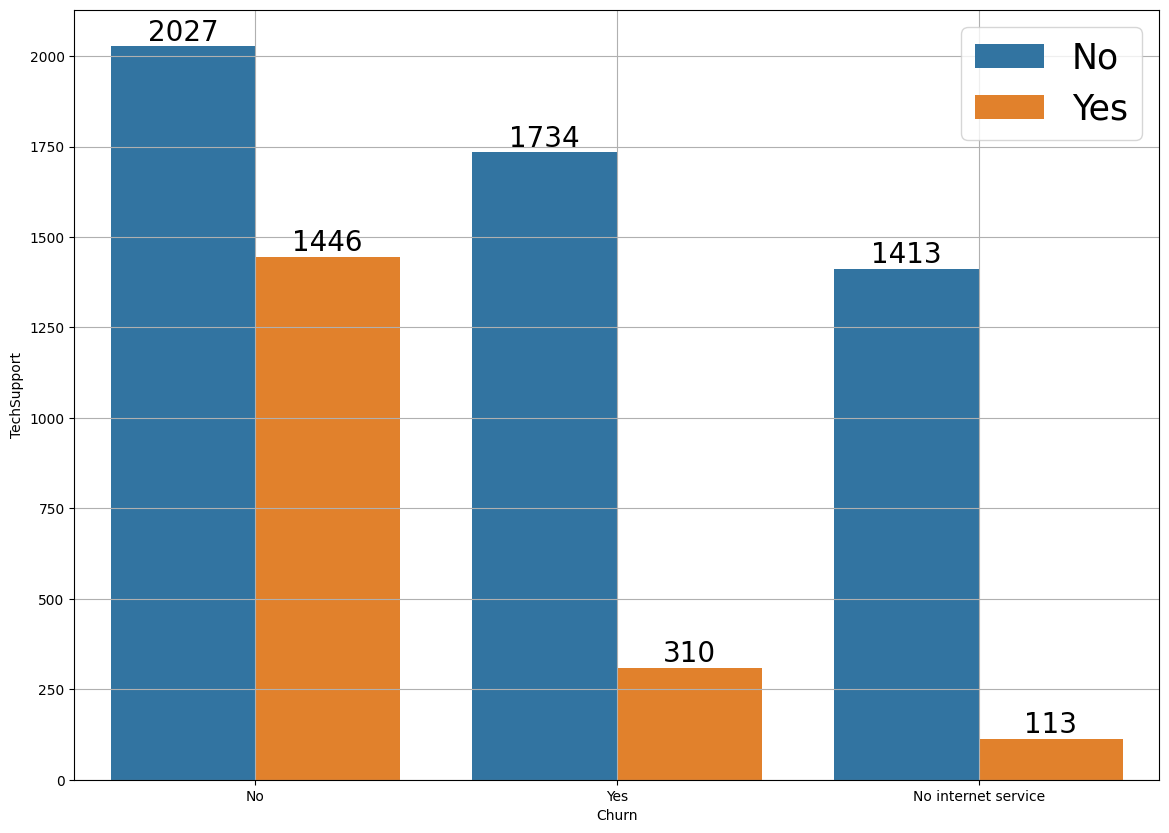

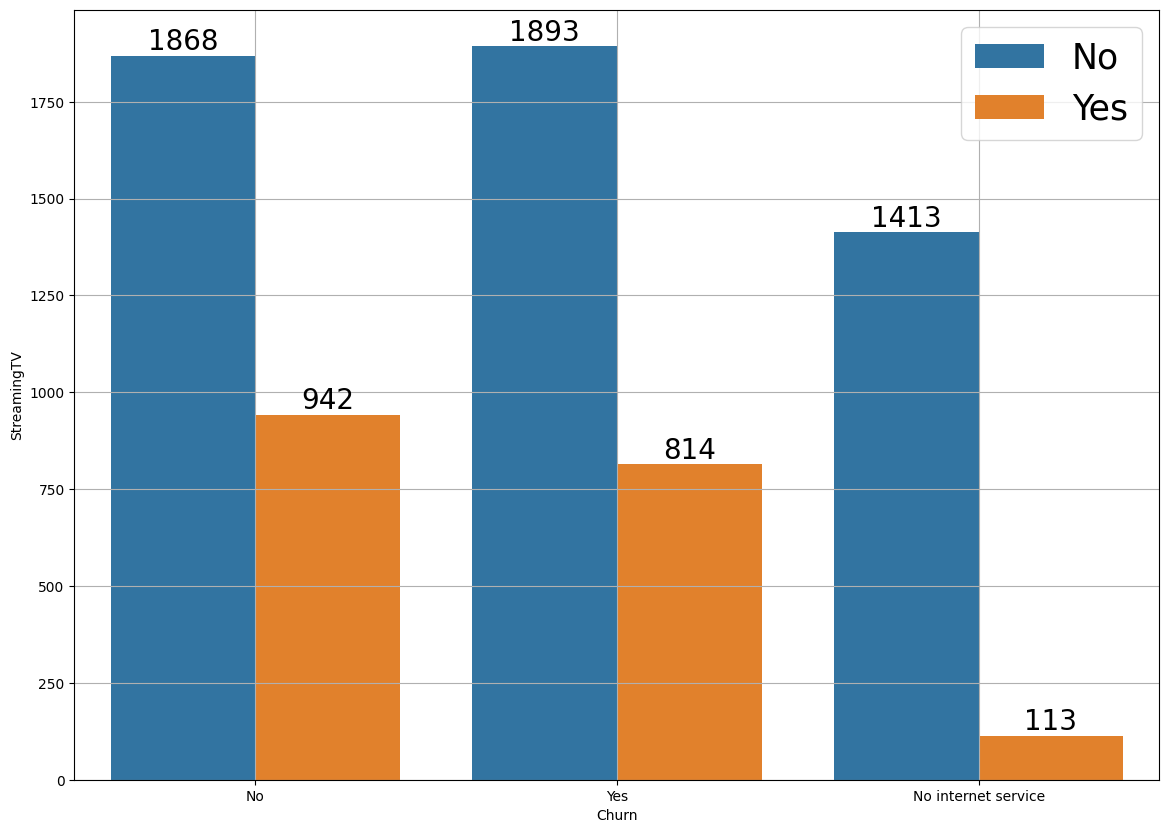

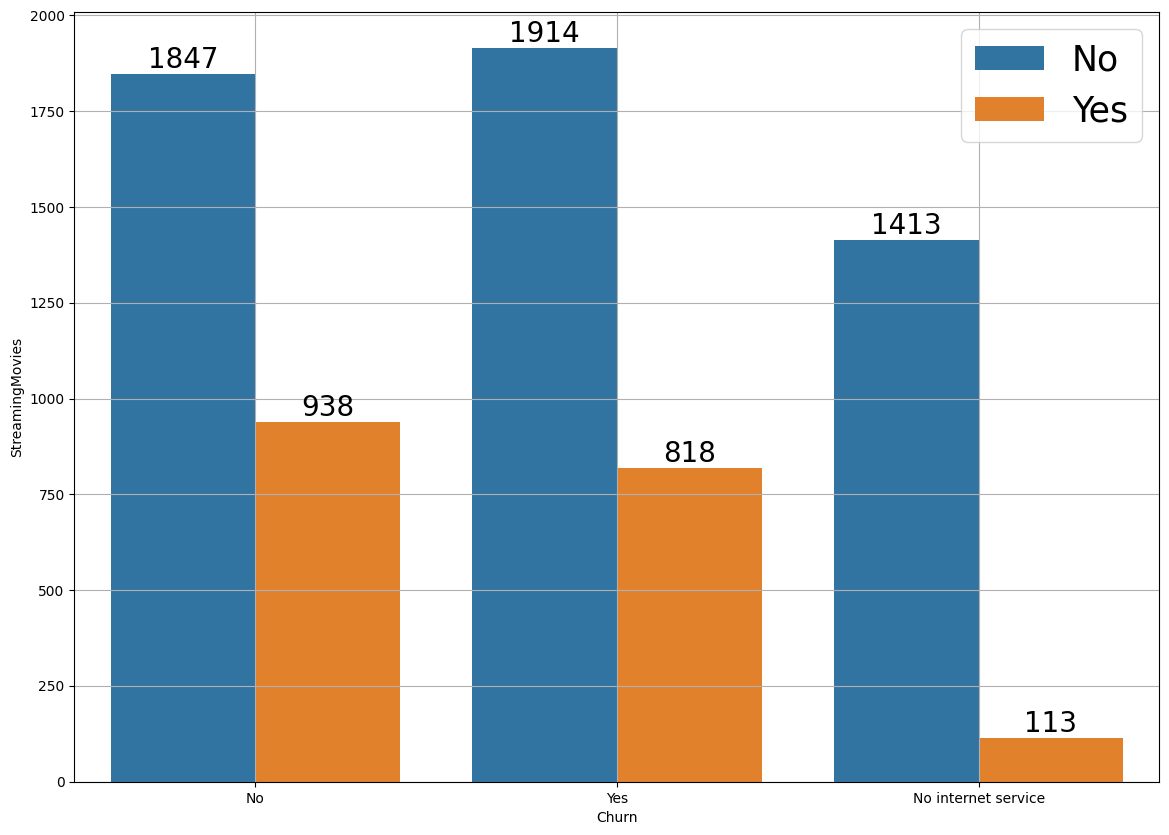

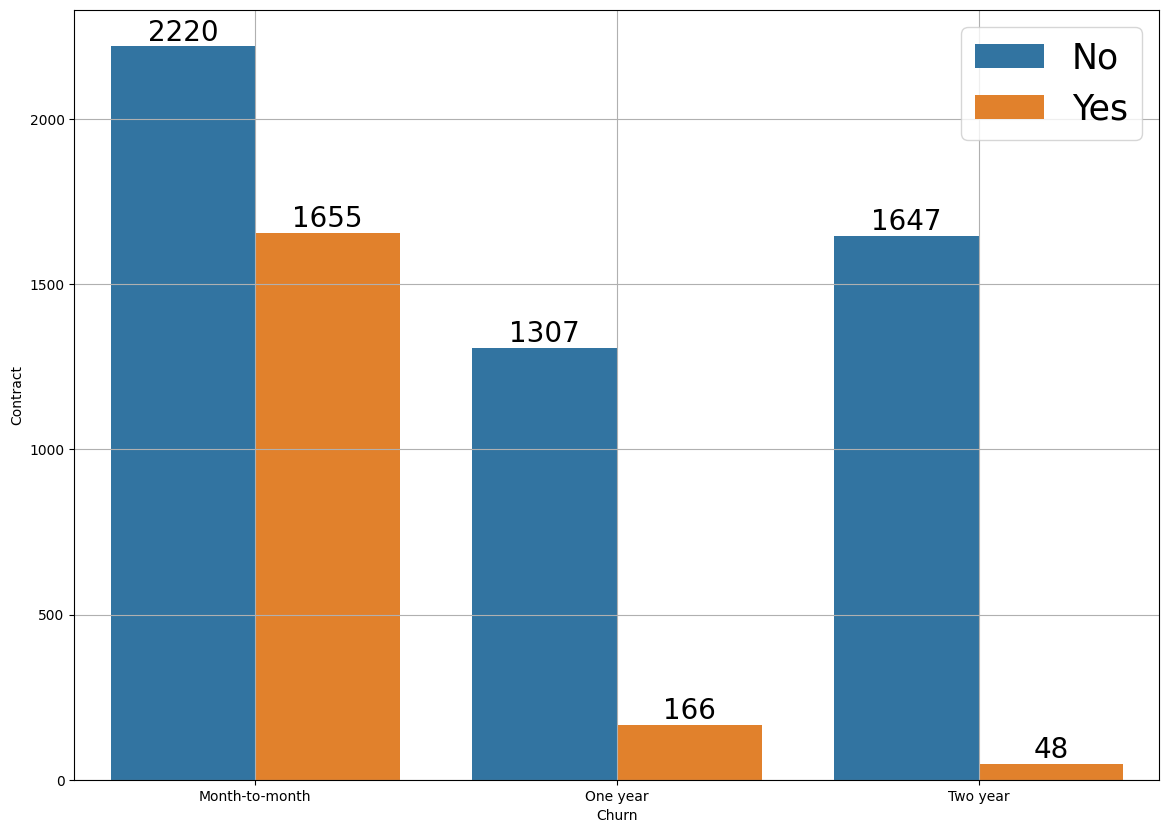

In [13]:
f(df, 'gender', 'Churn');
f(df, 'PaymentMethod', 'Churn');
f(df, 'PaperlessBilling', 'Churn');
f(df, 'Partner', 'Churn');
f(df, 'Dependents', 'Churn');
f(df, 'PhoneService', 'Churn');
f(df, 'MultipleLines', 'Churn');
f(df, 'InternetService', 'Churn');
f(df, 'OnlineSecurity', 'Churn');
f(df, 'OnlineBackup', 'Churn');
f(df, 'DeviceProtection', 'Churn');
f(df, 'TechSupport', 'Churn');
f(df, 'StreamingTV', 'Churn');
f(df, 'StreamingMovies', 'Churn');
f(df, 'Contract', 'Churn');

### Тип контракта - помесячная оплата сильно увеличивает отток, долгосрочные контракты снижают.
### Наличие партнера/иждивенцев - клиенты без семьи чаще уходят.
### Способ оплаты - электронные чеки ассоциируются с высоким оттоком, автоматические платежи - со стабильностью.
### Тип интернета - клиенты на оптоволокне более склонны к уходу.
### Дополнительные услуги - отсутствие онлайн-безопасности и техподдержки увеличивает отток.
### Телефонная служба - клиенты без телефонной службы менее склонны к уходу.
### Общая закономерность - клиенты с минимальным набором услуг и краткосрочными контрактами уходят чаще, а с полным пакетом услуг и долгосрочными обязательствами - остаются.



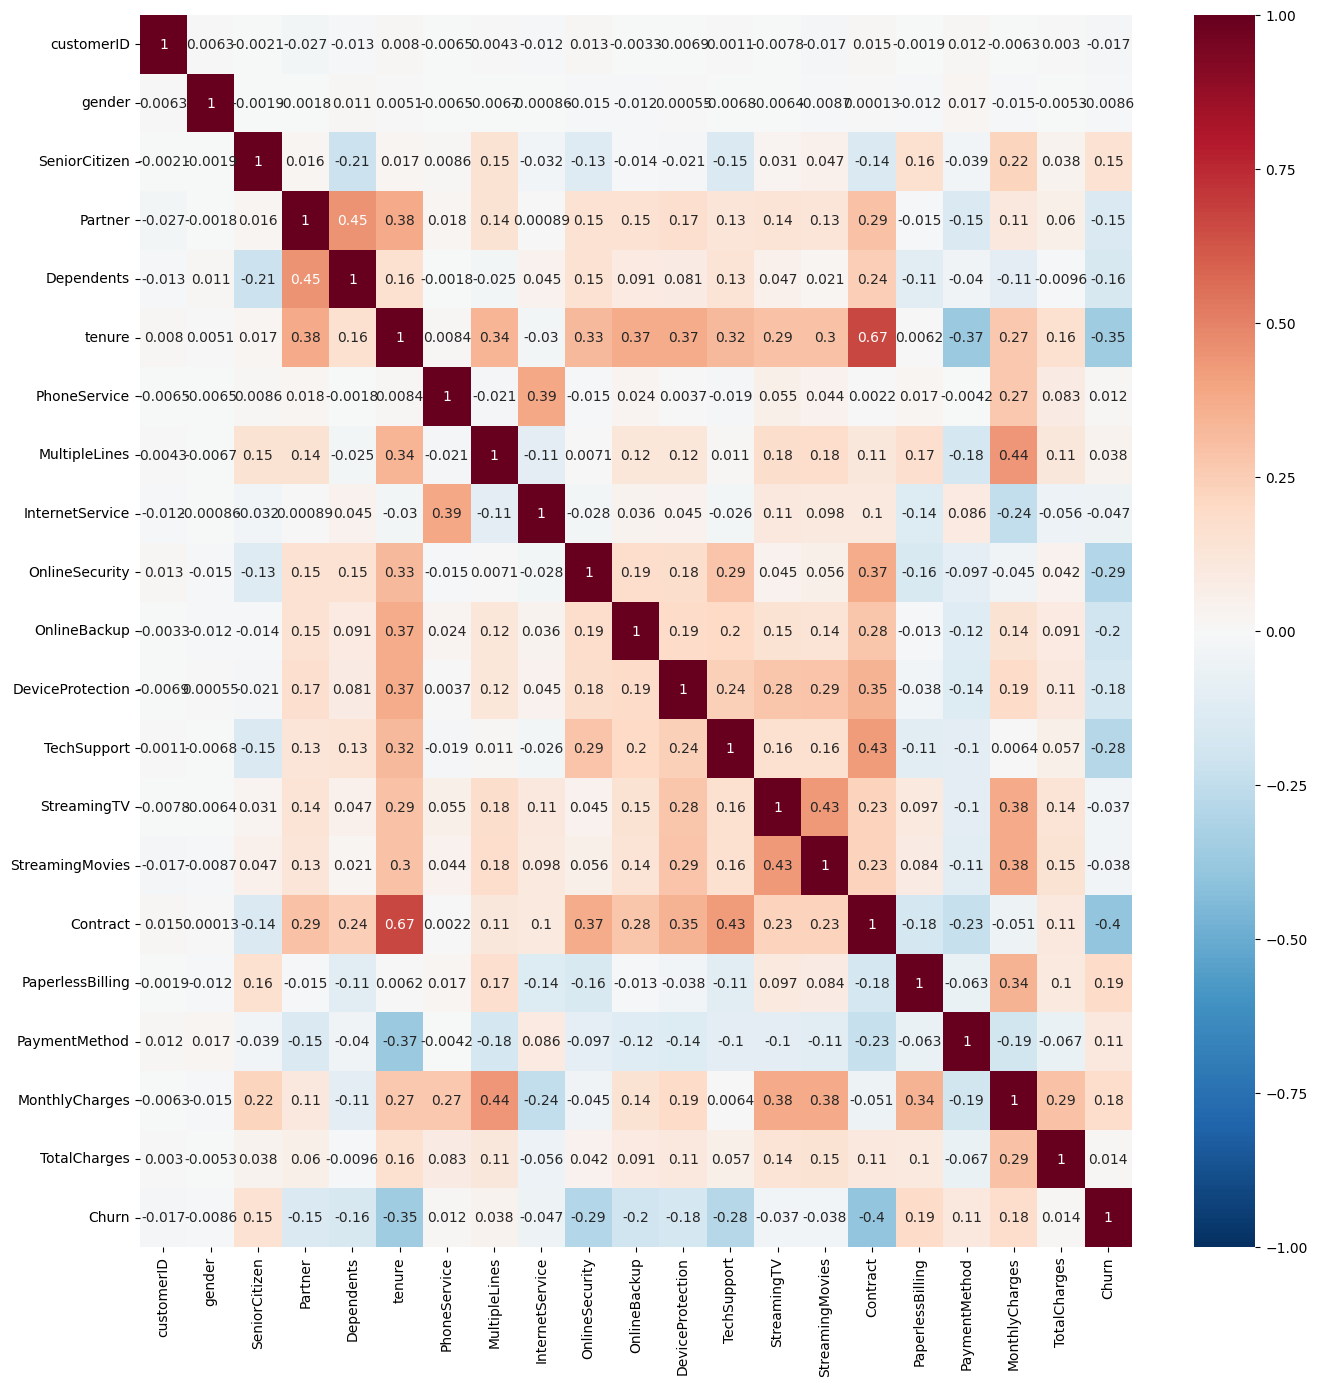

In [14]:
# Построение тепловой карты корреляций
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(dfe.corr(),
            vmin=-1, vmax=1,
            annot=True,
            cmap='RdBu_r',);

### Churn и tenure: -0.35 (чем больше срок обслуживания, тем меньше отток)
### Churn и Contract: -0.40 (долгосрочные контракты уменьшают отток)

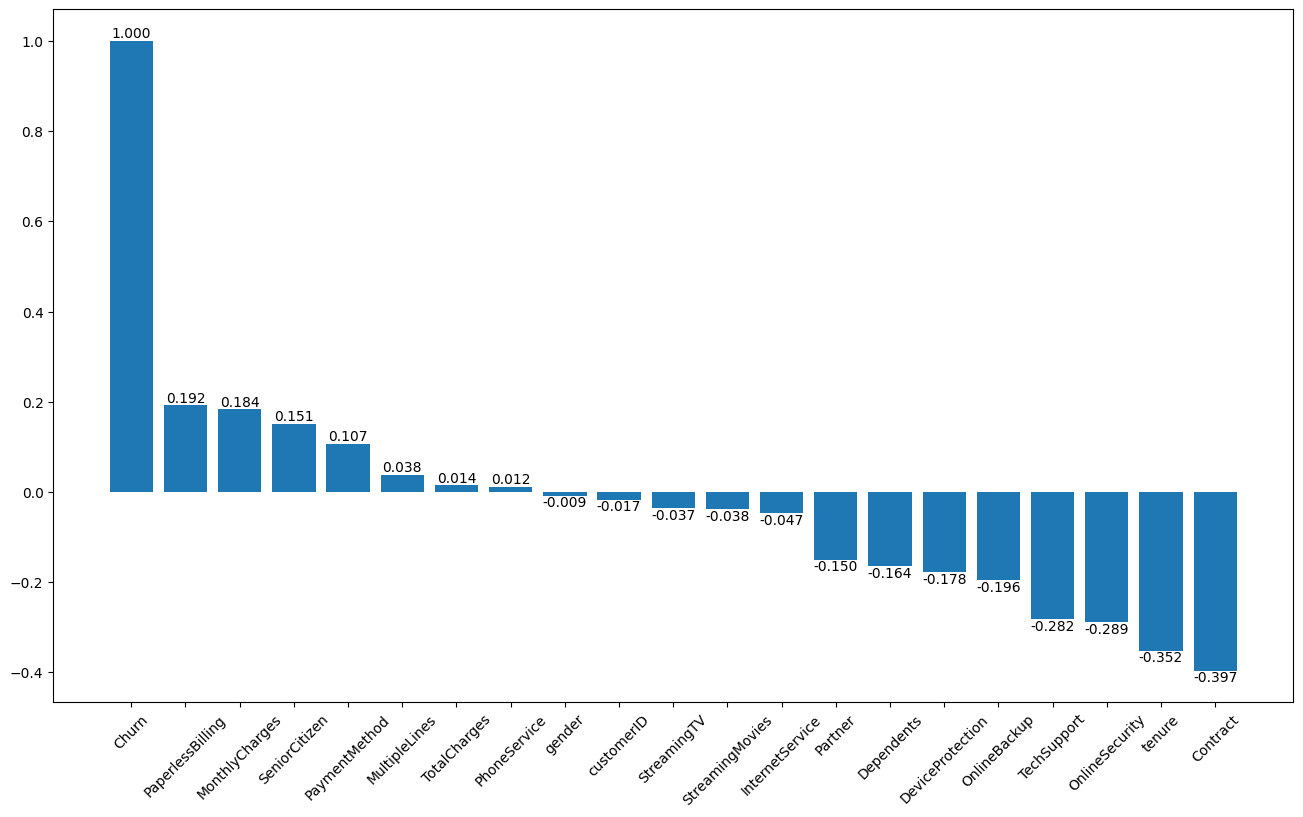

In [15]:
# Построение barplot корреляций с целевой переменной Churn
fig, ax = plt.subplots(figsize=(16, 9))
correlations = dfe.corr()['Churn'].sort_values(ascending=False)
features = correlations.index
values = correlations.values
ax.bar(features, values);
ax.tick_params(axis='x', rotation=45)
for c in ax.containers:
    ax.bar_label(c, fontsize=10, fmt = '%.3f')

In [16]:
from sklearn.model_selection import train_test_split

# Удаление некоррелирующих/ненужных и целевых признаков
dfe = dfe.drop(["customerID"], axis=1)  # ID клиента не влияет на отток
dfe = dfe.drop(["MonthlyCharges"], axis=1)  # дублирует информацию о услугах
dfe = dfe.drop(["TotalCharges"], axis=1)  # коррелирует с tenure
dfe = dfe.drop(["tenure"], axis=1)  # сильно коррелирует с контрактом

# Разделение на признаки и целевую переменную
dfey = dfe["Churn"]  # целевая переменная - отток
dfe = dfe.drop(["Churn"], axis=1)  # удаляем целевую переменную из признаков

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(dfe, 
                                                    dfey, 
                                                    test_size=0.15,  # 25% данных на тест
                                                    random_state=42)  # фиксируем случайность

In [17]:
# Импорт библиотек машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

## Построение моделей

In [18]:
Log_R = LogisticRegression(max_iter=10000, penalty='l2')
Log_R.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [19]:
SV = SVC(kernel='linear')
SV.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
forest = RandomForestClassifier(n_estimators=500)
forest.fit(x_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
cat = CatBoostClassifier(iterations=10,
                        loss_function='Logloss')
cat.fit(x_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5464659	total: 139ms	remaining: 1.25s
1:	learn: 0.4884688	total: 139ms	remaining: 558ms
2:	learn: 0.4648952	total: 140ms	remaining: 327ms
3:	learn: 0.4494668	total: 141ms	remaining: 212ms
4:	learn: 0.4381296	total: 142ms	remaining: 142ms
5:	learn: 0.4320291	total: 143ms	remaining: 95.2ms
6:	learn: 0.4278013	total: 144ms	remaining: 61.6ms
7:	learn: 0.4246213	total: 145ms	remaining: 36.1ms
8:	learn: 0.4234528	total: 145ms	remaining: 16.1ms
9:	learn: 0.4201268	total: 146ms	remaining: 0us


# Оценка качестваа моделей

In [23]:
# Импорт метрик для оценки качества моделей
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, RocCurveDisplay

In [24]:
# Функция для оценки качества моделей:
## Accuracy - общая точность предсказаний
## Precision - точность (доля правильно предсказанных положительных классов)
## Recall - полнота (доля найденных положительных классов)
## F1-score - баланс между precision и recall
def score(model):
    preds = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, preds)
    precision = metrics.precision_score(y_test, preds)
    recall = metrics.recall_score(y_test, preds)
    f1 = metrics.f1_score(y_test, preds)
    
    print(f"Модель: {type(model).__name__}")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print("-" * 40)

In [25]:
score(Log_R)
score(SV)
score(tree)
score(forest)
score(cat)

Модель: LogisticRegression
Accuracy:  0.7966
Precision: 0.6588
Recall:    0.4929
F1-score:  0.5639
----------------------------------------
Модель: SVC
Accuracy:  0.7833
Precision: 0.6432
Recall:    0.4220
F1-score:  0.5096
----------------------------------------
Модель: DecisionTreeClassifier
Accuracy:  0.7370
Precision: 0.5074
Recall:    0.4894
F1-score:  0.4982
----------------------------------------
Модель: RandomForestClassifier
Accuracy:  0.7796
Precision: 0.6079
Recall:    0.4894
F1-score:  0.5422
----------------------------------------
Модель: CatBoostClassifier
Accuracy:  0.7985
Precision: 0.6481
Recall:    0.5355
F1-score:  0.5864
----------------------------------------


In [26]:
def cor_map(model):
    model_pred= model.predict(x_test)
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, model_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.ylabel('Истинные значения')
    plt.xlabel('Предсказанные значения');

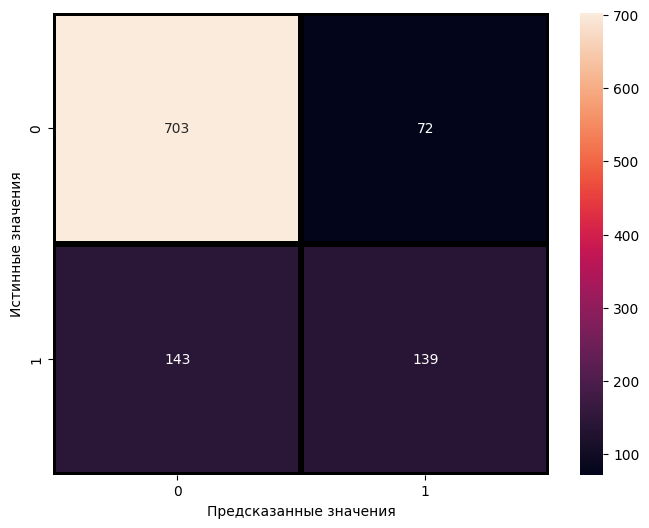

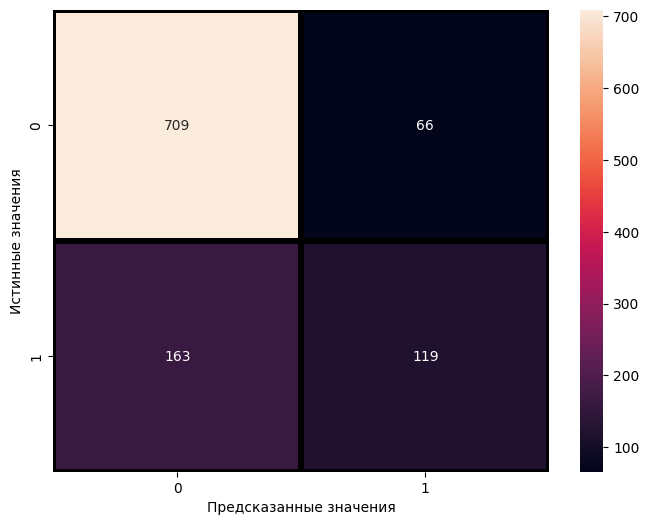

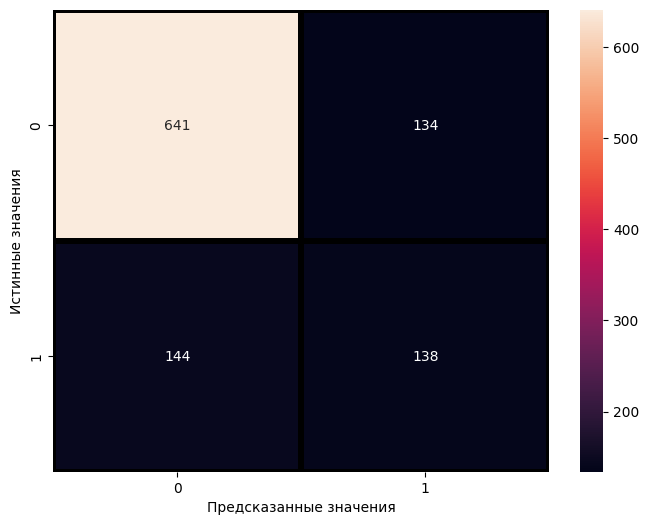

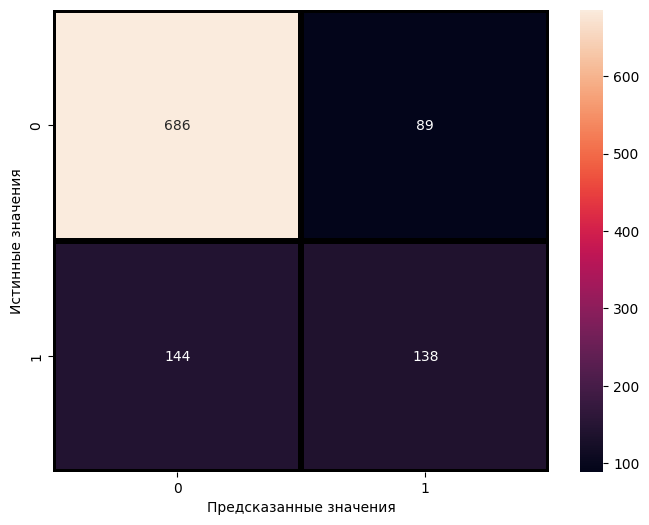

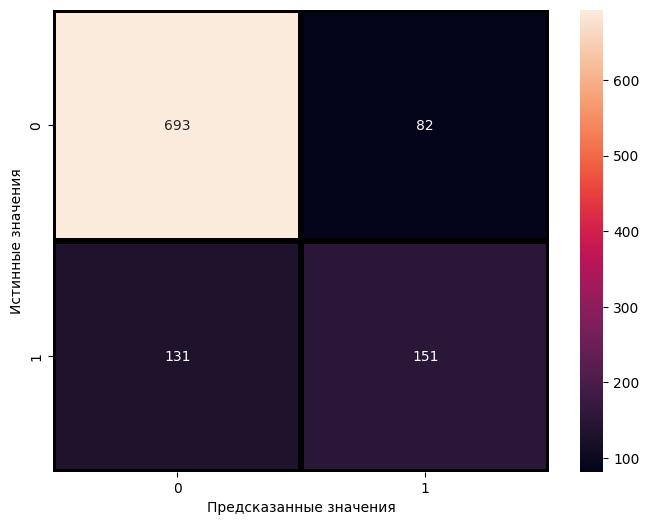

In [27]:
cor_map(Log_R)
cor_map(SV)
cor_map(tree)
cor_map(forest)
cor_map(cat)

In [28]:
# Функция для построения ROC-кривой:
def auc_plot(model):
    svc_disp = RocCurveDisplay.from_estimator(model, x_test, y_test)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')

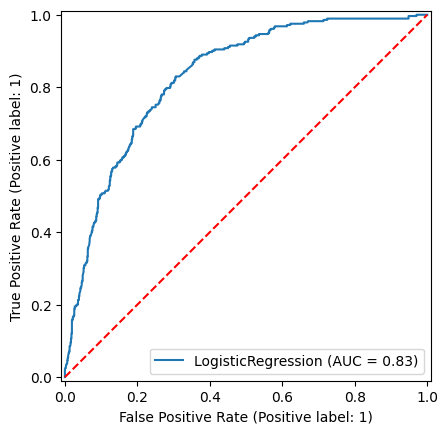

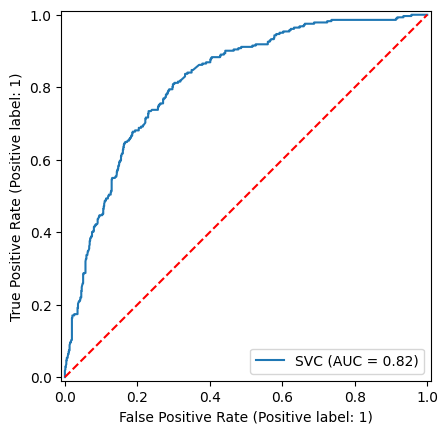

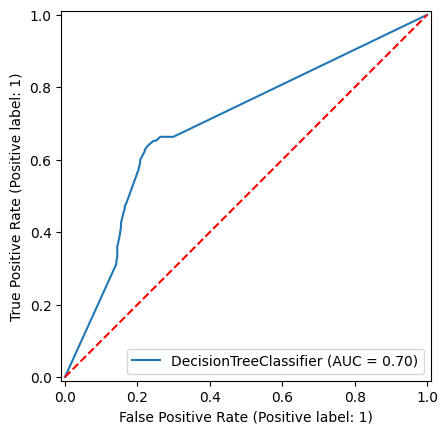

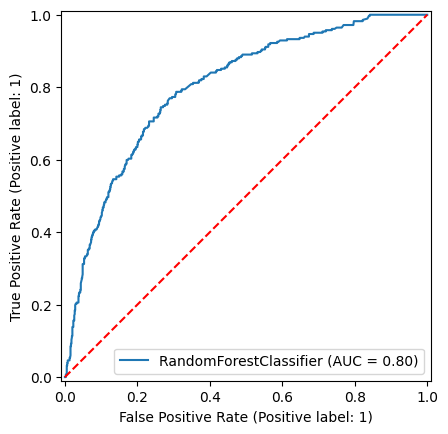

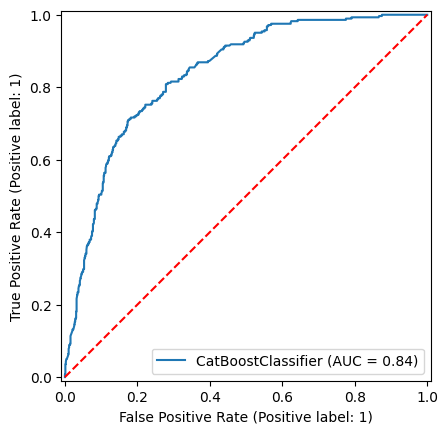

In [29]:
auc_plot(Log_R)
auc_plot(SV)
auc_plot(tree)
auc_plot(forest)
auc_plot(cat)

In [30]:
# CatBoost показывает наилучшее качество (AUC = 0.83)
# LogisticRegression незначительно уступает (AUC = 0.82)
# Все модели кроме DecisionTree имеют AUC > 0.75 - удовлетворительное качество

In [31]:
# Улучщение модели Catboost

In [32]:
# мпорт инструмента для подбора гиперпараметров моделей. 
# GridSearchCV автоматически перебирает комбинации параметров и находит оптимальные для максимального качества модели.
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {
    'iterations': [100, 200, 500, 1000],  # количество итераций
    'learning_rate': [0.01, 0.05],         # скорость обучения
    'depth': [2, 4, 6],                    # глубина деревьев
    'l2_leaf_reg': [1, 3]                  # регуляризация L2
}

grid_search = GridSearchCV(
    estimator=cat,                         # модель CatBoost
    param_grid=param_grid,                 # сетка параметров
    cv=3,                                  # 3-кратная кросс-валидация
    scoring='accuracy',                    # метрика - точность
    n_jobs=-1                              # использование всех ядер процессора
)
grid_search.fit(x_train, y_train)          # запуск поиска
print("Best parameters:", grid_search.best_params_)  # лучшие параметры

0:	learn: 0.6868966	total: 1.36ms	remaining: 679ms
1:	learn: 0.6807796	total: 2.69ms	remaining: 671ms
2:	learn: 0.6746420	total: 3.89ms	remaining: 644ms
3:	learn: 0.6691267	total: 5.1ms	remaining: 632ms
4:	learn: 0.6632407	total: 6.27ms	remaining: 621ms
5:	learn: 0.6578169	total: 7.44ms	remaining: 613ms
6:	learn: 0.6527192	total: 8.63ms	remaining: 608ms
7:	learn: 0.6478398	total: 9.76ms	remaining: 600ms
8:	learn: 0.6426917	total: 11ms	remaining: 599ms
9:	learn: 0.6376240	total: 12.1ms	remaining: 594ms
10:	learn: 0.6327037	total: 13.3ms	remaining: 589ms
11:	learn: 0.6279901	total: 14.4ms	remaining: 586ms
12:	learn: 0.6236267	total: 15.5ms	remaining: 582ms
13:	learn: 0.6189176	total: 16.8ms	remaining: 582ms
14:	learn: 0.6146127	total: 17.9ms	remaining: 580ms
15:	learn: 0.6105957	total: 19.1ms	remaining: 577ms
16:	learn: 0.6064790	total: 20.2ms	remaining: 575ms
17:	learn: 0.6022918	total: 21.5ms	remaining: 575ms
18:	learn: 0.5983374	total: 22.7ms	remaining: 575ms
19:	learn: 0.5946529	tota

In [34]:
# Создание и обучение оптимизированной версии CatBoost с подобранными гиперпараметрами для улучшения качества предсказаний.
cat2 = CatBoostClassifier(depth = 2,
                         iterations =700,
                         l2_leaf_reg = 1,
                         learning_rate = 0.05)
cat2.fit(x_train, y_train)

0:	learn: 0.6646253	total: 2.4ms	remaining: 1.68s
1:	learn: 0.6397145	total: 4.16ms	remaining: 1.45s
2:	learn: 0.6202245	total: 5.5ms	remaining: 1.28s
3:	learn: 0.6015605	total: 6.88ms	remaining: 1.2s
4:	learn: 0.5863753	total: 8.28ms	remaining: 1.15s
5:	learn: 0.5731655	total: 9.47ms	remaining: 1.09s
6:	learn: 0.5642512	total: 10.8ms	remaining: 1.06s
7:	learn: 0.5523669	total: 12ms	remaining: 1.04s
8:	learn: 0.5441411	total: 13.2ms	remaining: 1.01s
9:	learn: 0.5334162	total: 14.5ms	remaining: 1s
10:	learn: 0.5268183	total: 16.3ms	remaining: 1.02s
11:	learn: 0.5186053	total: 17.5ms	remaining: 1s
12:	learn: 0.5134541	total: 18.6ms	remaining: 982ms
13:	learn: 0.5068712	total: 19.6ms	remaining: 963ms
14:	learn: 0.5023868	total: 20.7ms	remaining: 945ms
15:	learn: 0.4970756	total: 21.8ms	remaining: 933ms
16:	learn: 0.4923028	total: 22.8ms	remaining: 917ms
17:	learn: 0.4890215	total: 23.9ms	remaining: 906ms
18:	learn: 0.4860962	total: 24.9ms	remaining: 894ms
19:	learn: 0.4832699	total: 26ms	

In [35]:
score(cat)
score(cat2)

Модель: CatBoostClassifier
Accuracy:  0.7985
Precision: 0.6481
Recall:    0.5355
F1-score:  0.5864
----------------------------------------
Модель: CatBoostClassifier
Accuracy:  0.8108
Precision: 0.6667
Recall:    0.5816
F1-score:  0.6212
----------------------------------------


In [36]:
# Модель стала лучше предсказывать отток клиентов после подбора гиперпараметров.

In [37]:
probabilities = cat2.predict_proba(x_test)  # вероятности предсказаний
predictions = cat2.predict(x_test)          # бинарные предсказания

# Создаем DataFrame с результатами
results_df = x_test.copy()
results_df['Prediction'] = predictions  # предсказанный класс (0/1)
results_df['Probability_No'] = probabilities[:, 0]  # вероятность "не уйдет"
results_df['Probability_Yes'] = probabilities[:, 1]  # вероятность "уйдет"

# Разделяем на уходящих и остающихся клиентов
churn_df = results_df[results_df['Prediction'] == 1]  # предсказанный отток
no_churn_df = results_df[results_df['Prediction'] == 0]  # предсказанные лояльные

# Сортируем по уверенности модели
churn_df_sorted = churn_df.sort_values('Probability_Yes', ascending=False)  # самые вероятные оттоки
no_churn_df_sorted = no_churn_df.sort_values('Probability_No', ascending=True)  # самые сомнительные лояльные

In [38]:
churn_df_sorted

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Prediction,Probability_No,Probability_Yes
1410,0,1,0,0,1,2,1,0,0,0,0,2,2,0,1,2,1,0.239543,0.760457
4307,0,1,0,0,1,2,1,0,0,0,0,2,2,0,1,2,1,0.239543,0.760457
6284,0,0,0,0,1,2,1,0,0,0,0,2,2,0,1,2,1,0.245710,0.754290
2577,0,0,0,0,1,2,1,0,0,0,0,2,2,0,1,2,1,0.245710,0.754290
5863,0,0,0,0,1,2,1,0,0,0,0,2,2,0,1,2,1,0.245710,0.754290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,0,0,1,1,1,0,1,0,2,2,0,2,0,0,1,2,1,0.495052,0.504948
4782,1,0,0,0,1,0,1,0,0,0,0,0,2,0,0,3,1,0.495513,0.504487
4656,0,0,1,1,1,2,1,0,0,0,0,0,0,0,1,0,1,0.496698,0.503302
1446,1,0,0,1,1,2,0,0,0,0,0,0,0,0,1,2,1,0.496856,0.503144


# Выявлено 246 клиента с высоким риском оттока

In [39]:
# Анализ важности признаков - показывает, какие факторы больше всего влияют на предсказание МОДЕЛИ.
feature_importance_cb = cat2.get_feature_importance()  # получение важности признаков

# Создание DataFrame
importance_df = pd.DataFrame({
    'feature': x_train.columns,              # названия признаков
    'importance': feature_importance_cb      # значения важности
})
importance_df = importance_df.sort_values('importance', ascending=False)  # сортировка по убыванию
importance_df  # вывод таблицы

,feature,importance
13,Contract,50.368830
7,OnlineSecurity,9.848669
10,TechSupport,9.650302
6,InternetService,6.303309
15,PaymentMethod,5.575075
12,StreamingMovies,4.196186
8,OnlineBackup,3.849289
11,StreamingTV,2.901663
14,PaperlessBilling,1.931547
1,SeniorCitizen,1.094578


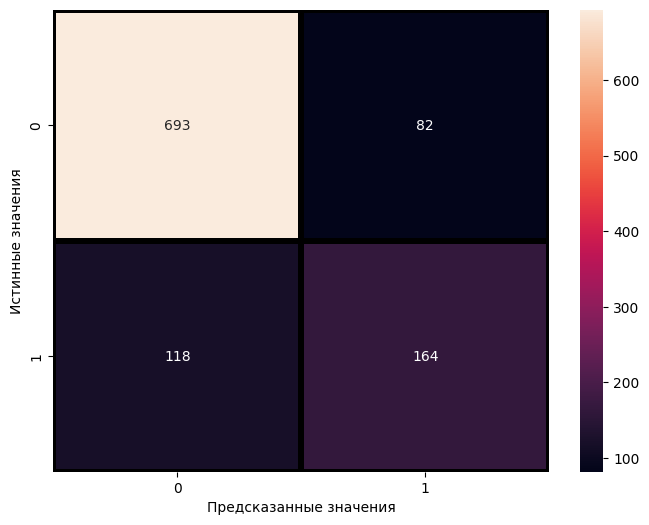

In [40]:
cor_map(cat2)

In [41]:
import eli5 
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(
    cat2,
    random_state=42,
    n_iter=1000,
    cv='prefit'
).fit(x_test, y_test)

eli5.show_weights(perm, feature_names=x_test.columns.tolist())

# Перемешивание признаков — это метод, который позволяет оценить, насколько каждый признак важен для предсказания модели.
# (Более точный метод если сравнивать с get_feature_importance())
# Таблица показывает среднее уменьшение точности модели из-за перемешивания признака.

Weight,Feature
0.0445 ± 0.0156,Contract
0.0327 ± 0.0127,InternetService
0.0249 ± 0.0150,OnlineSecurity
0.0210 ± 0.0117,TechSupport
0.0209 ± 0.0120,PaymentMethod
0.0138 ± 0.0099,OnlineBackup
0.0096 ± 0.0090,PaperlessBilling
0.0077 ± 0.0064,Partner
0.0065 ± 0.0063,DeviceProtection
0.0059 ± 0.0044,Dependents


# Топ-5 самых влиятельных факторов:
### Contract (Тип контракта) - 0.0394
### InternetService (Тип интернет-услуги) - 0.026
### OnlineSecurity (Онлайн-безопасность) - 0.0251
### PaymentMethod (Способ оплаты) - 0.020
### TechSupport (Техническая поддержка) - 0.0172

### На основе анализа базы данных из 1057 клиентов была протестирована модель, прогнозирующая уход клиента от оператора связи. Ключевые результаты: общая точность прогноза (Accuracy) составляет 81% - модель корректно предсказала судьбу (уйдет/останется) для 857 клиентов из 1057, что свидетельствует о высокой надежности модели в целом. Точность обнаружения "уходящих" (Precision) равна 66.6% - из всех клиентов, которых модель пометила как "уходящих" (246 человека), реально ушли 164. Это означает: каждые 2 из 3 целевых клиентов, на которых мы направим удержание, являются реальными "рисками", а один из трех будет ложно-позитивным случаем.